## Linear Regression Case Study - Shared Bikes

### Reading and understanding data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#reading the dataset
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The dataset doesnot have any null values.

#### Removing columns that are not required in the analysis

The columns 'casual' and 'registered' can be dropped from the dataset as those will not add any additional information in modelling behaviour of a signle user. <br> 
<br>
The column 'dteday' can also be dropped as all its elements, i.e., day, month,year, whether a day is weekday, weekend or holiday are already present in the dataset as different columns. Therefore 'dteday' column is adding no extra information but increasing redundancy in the dataset. <br>
<br>
Lastly, the column 'instant' is just providing index of each record which is not useful in modelling factors driving demand of the bikes.

In [7]:
# dropping 'casual'. registered' and 'dteday' columns
bike_df = bike_df.drop(['casual' , 'registered', 'dteday', 'instant'], axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Data preprocessing

- Renaming the values of the categorical variables with more than one categories. Such as, season, weather, month, weekday

In [8]:
# Renaming the values of the 'season' column
seasons = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bike_df['season'] = bike_df['season'].map(seasons)

In [9]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
weather = {1: 'clear', 2: 'mist', 3: 'light-rain', 4: 'heavy-rain'}
bike_df['weathersit'] = bike_df['weathersit'].map(weather)

In [11]:
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bike_df['mnth'] = bike_df['mnth'].map(month)

In [12]:
week = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
bike_df['weekday'] = bike_df['weekday'].map(week)

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Changing datatypes of the categorical variables 
for col in ['season','holiday','workingday','weathersit','yr','mnth','weekday']:
    bike_df[col]=bike_df[col].astype('category')

In [15]:
bike_df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [16]:
num_col = bike_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
num_col

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
x = num_col.columns
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [18]:
cat_col = bike_df[['season','holiday','workingday','weathersit','yr','mnth','weekday']]
cat_col

,season,holiday,workingday,weathersit,yr,mnth,weekday
0,spring,0,1,mist,0,Jan,Mon
1,spring,0,1,mist,0,Jan,Tue
2,spring,0,1,clear,0,Jan,Wed
3,spring,0,1,clear,0,Jan,Thu
4,spring,0,1,clear,0,Jan,Fri
...,...,...,...,...,...,...,...
725,spring,0,1,mist,1,Dec,Fri
726,spring,0,0,mist,1,Dec,Sat
727,spring,0,0,mist,1,Dec,Sun
728,spring,0,1,clear,1,Dec,Mon


### Visualization

##### Numerical Variables

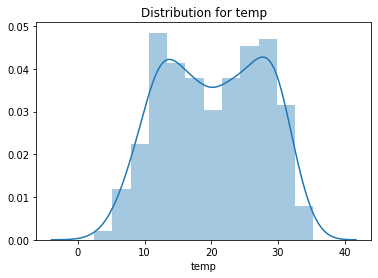

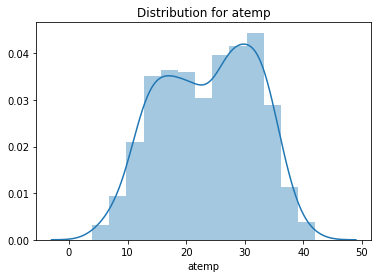

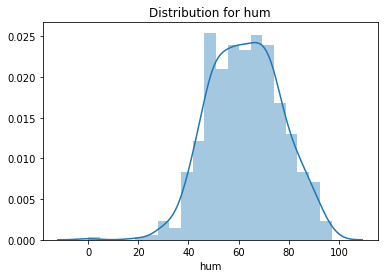

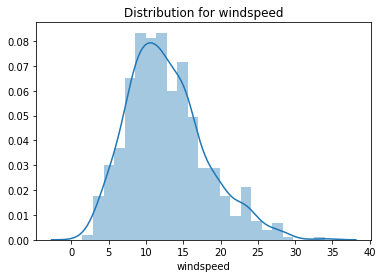

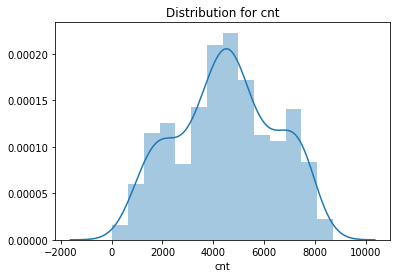

In [19]:
for col in x:
    sns.distplot(bike_df[col])
    plt.title("Distribution for "+col)
    plt.show();
    print("=================================")

##### Observations from univariate analysis of numerical data
- The distribution of temperature is bimodal (first mode at approximately 15 and other at second one at approximately 30 degree) with short tails at both ends, indicating two prominent seasons. <br>
- The variable 'atemp' is showing an almost similar distribution to that of the 'temp' variable. <br>
- The distribution of humidity ('hum' variable) is showing a bell-shaped or normal distribution with a comparatively long tail at the lower end, indicating presence of outliers at lower end. <br>
- The distribution of 'windspeed' variable also shows an almost normal or bell-shaped distribution with a longer tail at the higher end. <br>
- The distribution of the independent variable 'cnt' (count of bikes hired) is showing an unique distribution in the sense that though it is an unimodal distribution and the overall shape is like bell but two spikes showing at both side of the mode.

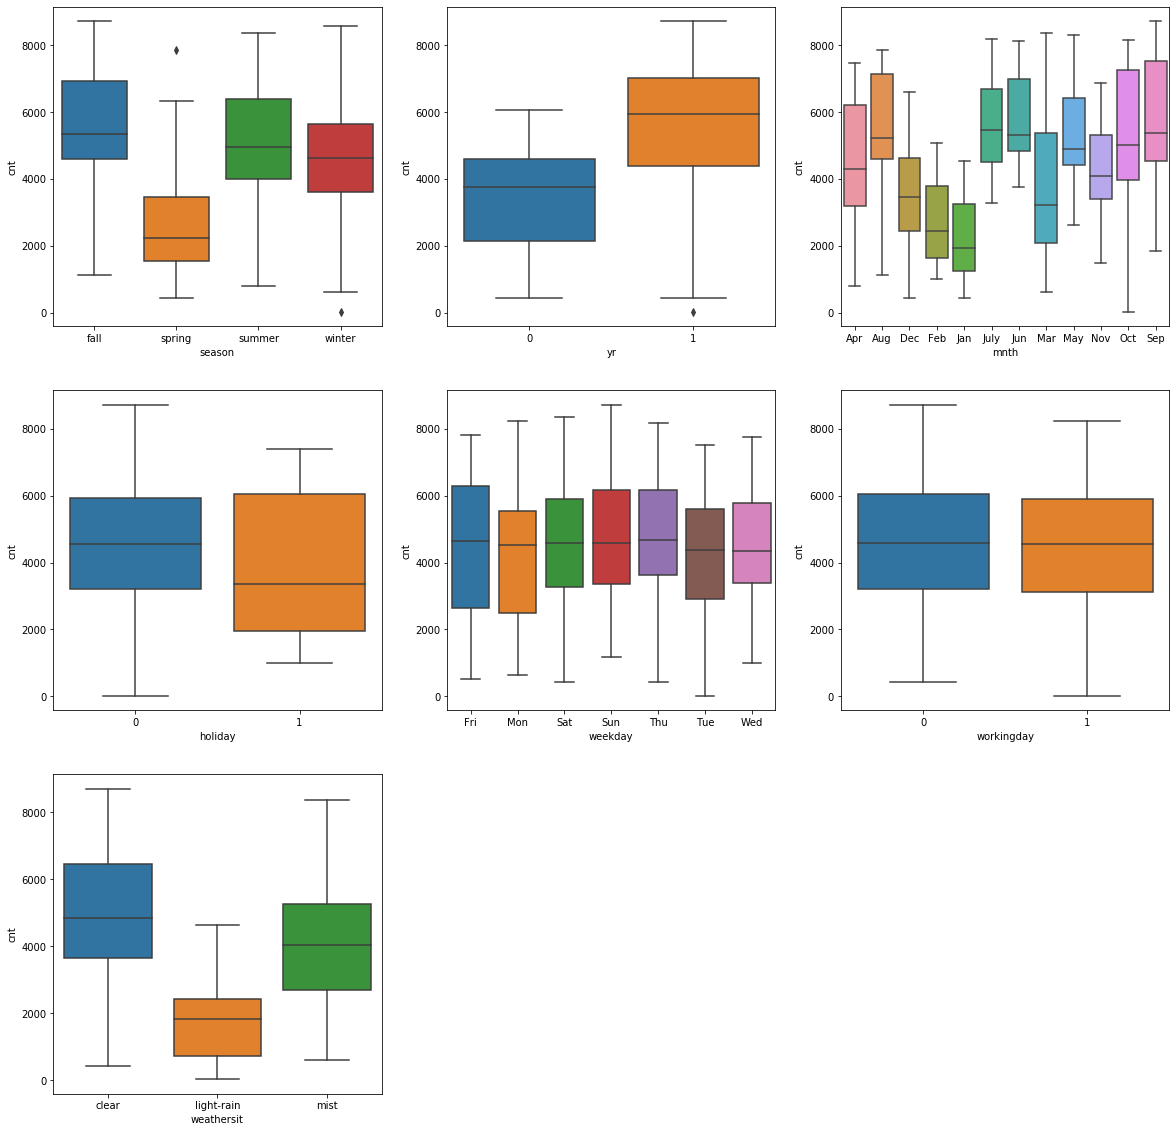

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1) # plt.subplot(331)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.subplot(3,3,2) # plt.subplot(331)
sns.boxplot(x='yr', y='cnt', data=bike_df)
plt.subplot(3,3,3) # plt.subplot(331)
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.subplot(3,3,4) # plt.subplot(331)
sns.boxplot(x='holiday', y='cnt', data=bike_df)
plt.subplot(3,3,5) # plt.subplot(331)
sns.boxplot(x='weekday', y='cnt', data=bike_df)
plt.subplot(3,3,6) # plt.subplot(331)
sns.boxplot(x='workingday', y='cnt', data=bike_df)
plt.subplot(3,3,7) # plt.subplot(331)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)
plt.show();

##### Observations from univariate analysis of categorical variables:
- The variable season has four categories, spring, summer, fall and winter. From the boxplot it can be observed that the median count of cycles rented in the fall season is highest and in spring season is the lowest.
- The number of cycles rented in the year 2019 is considerably high compared to the year 2018.
- Observing the boxplot of the 'mnth' variable we can see that high demand for rented cycles are between the months June to October. Lowest demand can be observed during the months January and February
- During the holidays considerably low average demand of bikes can be observed. Which brings us to the intuition that the rented cycles are used more in communication to work or schools.
- During the weekdays though average demand for rented bycles are more or less similar, there is diffirence in distribution of the quantiles.
- Whether a day is a working day or not has not impacted the demand for the rented bikes much.
- The weather of a day, represented by the variable 'weathersit', has shown quaite the effect on the demand for a rented cycles. Demand is the highest during clear days and the lowest during rainly days. 

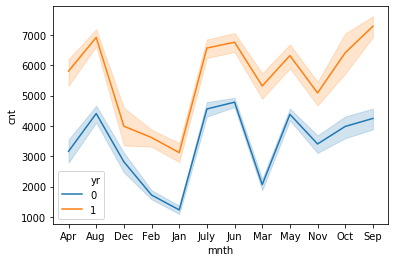

In [21]:
sns.lineplot(data=bike_df, x='mnth',  y='cnt', hue='yr');

The above timeseries plot shows there is no change in the pattern of demand for rented bicyles in two years. the only difference is the number of rented cycles has increased from 2018 to 2019 for each month.

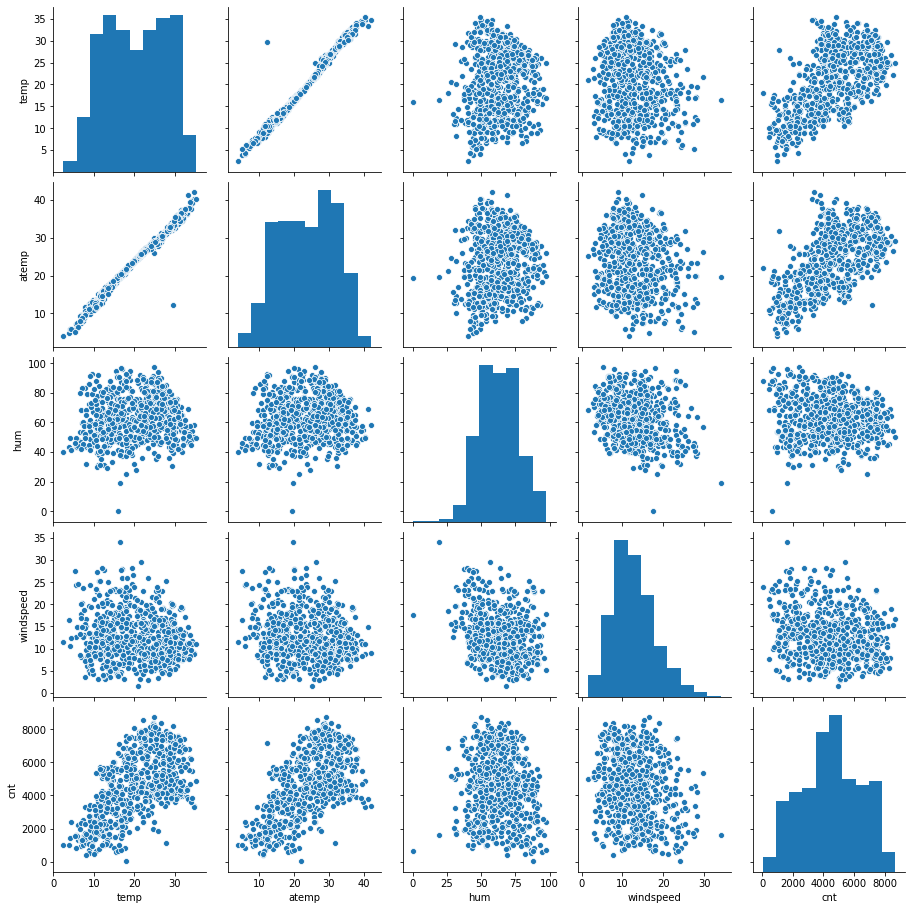

In [22]:
sns.pairplot(bike_df[x]);

##### Observations from the pairplot:
The above pairplot shows the association between the numerical bariables with each other. The last row is showing the assocoation of the target variable 'cnt' with the other numerical varibales. <br>
The variables 'temp' and 'atemp' is showing almost same association with the target variable, and if we look at the scatter plot of the variables 'temp' and 'atemp' with each other, it shows almost perfect correlation. therefore, presence of both the variables is only increasing redundancy in the model. Therefore, one of them can be dropped.
The variables 'hum' and 'windspeed' is not showing much of a pattern with the target variable or any other variable. Therefore both are required in the model.

In [23]:
bike_df[x].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


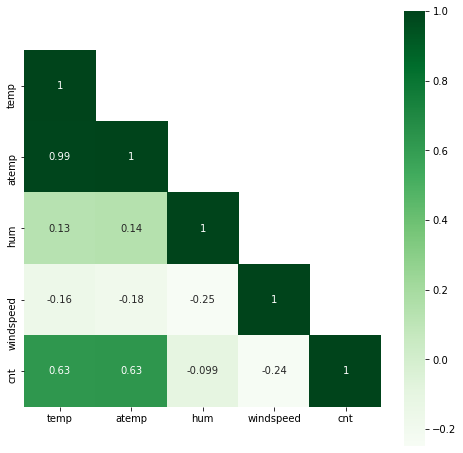

In [24]:
mask = np.array(bike_df[x].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(bike_df[x].corr(), mask=mask, square=True, annot=True, cmap='Greens');

The heatmap is reinforcing the picture that we got from the pairplot. 
- We see an almost perfect correlation (0.99) between the variables 'temp' and 'atemp'. also both are showing the exactly same correlation with the target varibale (0.63).
- 'windspeed' and ;hum' is not showing much of a correlation with other variables including the target variable 'cnt'.


In [26]:
# dropping the 'atemp' variable
bike_df.drop(['atemp'],axis=1, inplace=True)
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

### Data preparation

In [27]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.3 KB


In [29]:
# creating dummy variables for the categorical variables
bike_dummies = pd.get_dummies(cat_col, drop_first=True)
bike_df = pd.concat([bike_df, bike_dummies], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,workingday_1,weathersit_light-rain,weathersit_mist,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,spring,0,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,mist,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
bike_df.drop(cat_col, axis = 1, inplace = True)
bike_df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,workingday_1,weathersit_light-rain,weathersit_mist,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Splitting the data into train and test

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

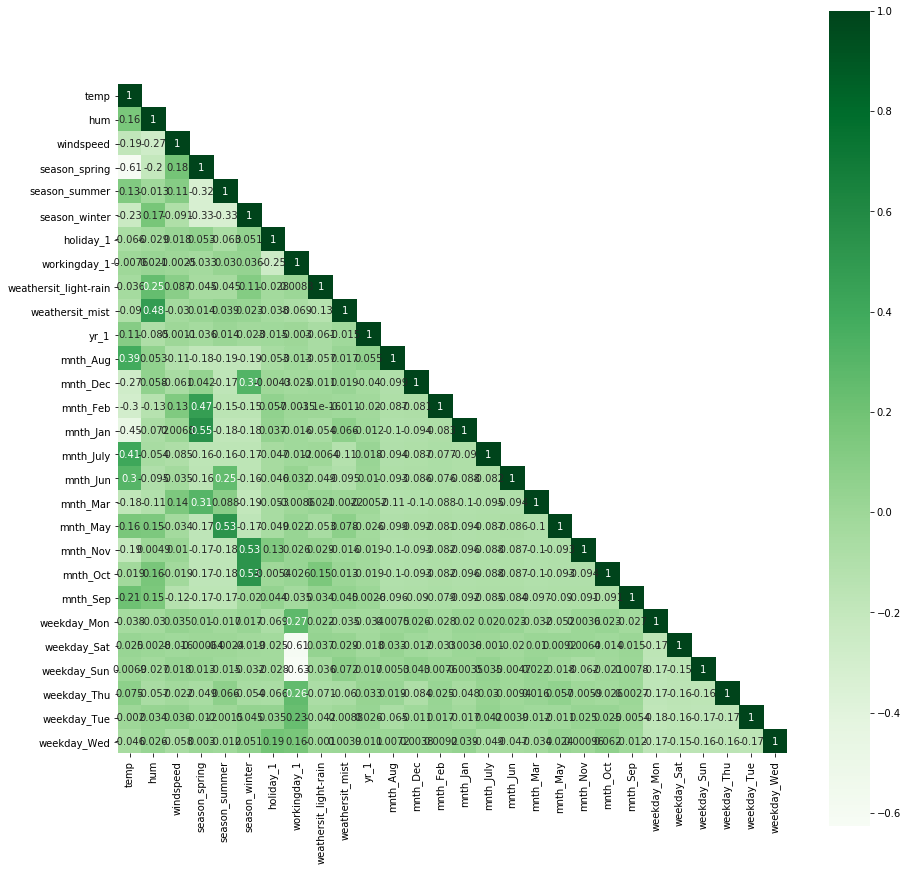

In [40]:
mask = np.array(bike_train.corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(bike_train.corr(), mask=mask, square=True, annot=True, cmap='Greens');

##### Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_col = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[num_col] = scaler.fit_transform(bike_train[num_col])

In [36]:
bike_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,workingday_1,weathersit_light-rain,weathersit_mist,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
bike_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'holiday_1', 'workingday_1', 'weathersit_light-rain', 'weathersit_mist', 'yr_1', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'], dtype='object')

##### Dividing into X and Y sets for the model building

In [37]:
bike_y_train = bike_train.pop('cnt')
bike_X_train = bike_train

##### Building a linear model

In [43]:
import statsmodels.api as sm

# Add a constant
bike_X_train_lm = sm.add_constant(bike_X_train[['temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'holiday_1', 'workingday_1', 'weathersit_light-rain', 'weathersit_mist', 'yr_1', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed']])

# Create a first fitted model
lr = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [44]:
lr.params

const                   -0.181738
temp                     0.447940
hum                     -0.102182
windspeed               -0.138387
season_spring           -0.194787
season_summer            0.188271
season_winter            0.494254
holiday_1               -0.603568
workingday_1            -0.269749
weathersit_light-rain   -1.120953
weathersit_mist         -0.264539
yr_1                     1.028901
mnth_Aug                 0.095854
mnth_Dec                -0.203542
mnth_Feb                -0.166147
mnth_Jan                -0.283510
mnth_July               -0.155588
mnth_Jun                 0.004343
mnth_Mar                 0.002710
mnth_May                 0.107251
mnth_Nov                -0.185204
mnth_Oct                 0.025805
mnth_Sep                 0.383537
weekday_Mon             -0.109786
weekday_Sat             -0.251007
weekday_Sun             -0.222672
weekday_Thu              0.017218
weekday_Tue             -0.117212
weekday_Wed             -0.050099
dtype: float64

In [45]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.33e-179
Time:                        23:33:23   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             534.7
Df Residuals:                     481   BIC:                             657.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = pd.DataFrame()
vif['Features'] = bike_X_train.columns
vif['VIF'] = [variance_inflation_factor(bike_X_train.values, i) for i in range(bike_X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,workingday_1,38.71
3,season_spring,13.52
5,season_winter,12.53
4,season_summer,9.73
24,weekday_Sun,7.75
23,weekday_Sat,7.43
19,mnth_Nov,7.17
0,temp,7.11
20,mnth_Oct,6.81
11,mnth_Aug,6.46


In [49]:
# dropping 'workingday_1' due to high p-value and high vif
X = bike_X_train.drop('workingday_1', 1,)

In [50]:
bike_X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [51]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          6.08e-180
Time:                        23:45:47   Log-Likelihood:                -238.74
No. Observations:                 510   AIC:                             533.5
Df Residuals:                     482   BIC:                             652.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.45

In [52]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_winter,11.42
3,season_spring,10.28
0,temp,7.08
13,mnth_Jan,5.48
18,mnth_Nov,5.21
19,mnth_Oct,5.15
11,mnth_Dec,4.38
12,mnth_Feb,4.03
4,season_summer,3.80
16,mnth_Mar,3.16


In [53]:
X = bike_X_train.drop('mnth_Jun', 1,)

In [54]:
bike_X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [55]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.25e-180
Time:                        23:53:08   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             532.7
Df Residuals:                     482   BIC:                             651.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,workingday_1,28.36
3,season_spring,13.24
5,season_winter,12.42
4,season_summer,9.10
18,mnth_Nov,6.68
14,mnth_Jan,6.21
19,mnth_Oct,6.05
23,weekday_Sun,5.80
22,weekday_Sat,5.65
12,mnth_Dec,5.54


In [57]:
X = bike_X_train.drop('mnth_Mar', 1,)

In [58]:
bike_X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [60]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.24e-180
Time:                        23:59:04   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             532.7
Df Residuals:                     482   BIC:                             651.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [64]:
X = bike_X_train.drop(['mnth_Mar', 'mnth_Jun'], 1,)

In [65]:
bike_X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [66]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.08e-181
Time:                        00:01:27   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             530.7
Df Residuals:                     483   BIC:                             645.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [67]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,workingday_1,25.88
5,season_winter,11.67
3,season_spring,10.68
4,season_summer,9.05
22,weekday_Sun,5.30
21,weekday_Sat,5.20
17,mnth_Nov,5.17
0,temp,4.85
18,mnth_Oct,4.85
11,mnth_Aug,3.70


In [68]:
X = bike_X_train.drop(['mnth_Mar', 'mnth_Jun', 'workingday_1'], 1,)

In [69]:
bike_X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [70]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.51e-182
Time:                        00:04:09   Log-Likelihood:                -238.74
No. Observations:                 510   AIC:                             529.5
Df Residuals:                     484   BIC:                             639.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.44

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_winter,9.86
3,season_spring,5.09
17,mnth_Oct,4.38
16,mnth_Nov,4.38
0,temp,4.27
4,season_summer,3.27
11,mnth_Dec,3.09
13,mnth_Jan,2.65
8,weathersit_mist,2.35
14,mnth_July,2.10


### RFE

In [72]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [83]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(bike_X_train, bike_y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(bike_X_train, bike_y_train)

In [84]:
list(zip(bike_X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 9),
 ('windspeed', False, 4),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('holiday_1', True, 1),
 ('workingday_1', False, 5),
 ('weathersit_light-rain', True, 1),
 ('weathersit_mist', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13)]

In [85]:
col = bike_X_train.columns[rfe.support_]
col

Index(['temp', 'season_spring', 'season_winter', 'holiday_1', 'weathersit_light-rain', 'weathersit_mist', 'yr_1', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep'], dtype='object')

In [86]:
bike_X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'workingday_1', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'], dtype='object')

In [87]:
# Creating X_test dataframe with RFE selected variables
bike_X_train_rfe = bike_X_train[col]

In [88]:
bike_X_train_rfe = sm.add_constant(bike_X_train_rfe)

In [89]:
lm = sm.OLS(bike_y_train,bike_X_train_rfe).fit()

In [90]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.48e-180
Time:                        11:53:15   Log-Likelihood:                -277.42
No. Observations:                 510   AIC:                             580.8
Df Residuals:                     497   BIC:                             635.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [91]:
vif = pd.DataFrame()
X = bike_X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.25
1,temp,3.18
2,season_spring,2.74
3,season_winter,2.26
11,mnth_Nov,1.70
9,mnth_Jan,1.59
8,mnth_Dec,1.42
10,mnth_July,1.30
12,mnth_Sep,1.11
5,weathersit_light-rain,1.05


From the summary of the model 'lm' and the table of the VIFs, we can see that the all the independent variables are significant and the values of VIFs are within range. The R-square and adjust R-squared of the model are showing almost 82% of fit. The probability of F-statistic is also close to 0 which indicated a overall good significance of the model.

### Residual analysis of the train data

In [92]:
y_train_cnt = lm.predict(bike_X_train_rfe)

Text(0.5, 0, 'Errors')

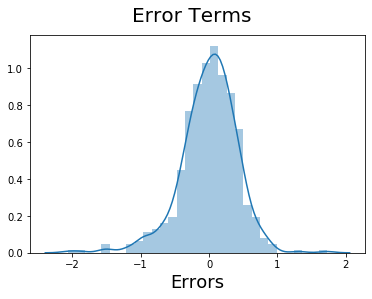

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(bike_y_train - y_train_cnt)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)                         

The distribution of the error terms are following normal distribution and the mean value of the distribtuion is at 0.

### Making predictions

##### Applying scaling on the test case

In [94]:
num_col = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[num_col] = scaler.fit_transform(bike_test[num_col])

##### Dividing into X and y sets

In [95]:
bike_y_test = bike_test.pop('cnt')
bike_X_test = bike_test

In [97]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
bike_X_test_rfe = bike_X_test[col]

# Adding a constant variable 
bike_X_test_rfe = sm.add_constant(bike_X_test_rfe)

In [98]:
# Making predictions
bike_y_pred = lm.predict(bike_X_test_rfe)

### Model Evaluation

Text(0, 0.5, 'y_pred')

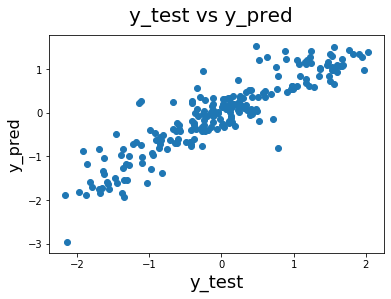

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(bike_y_test,bike_y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The scatter plot of the actual value of y from the test data and the predicted value of y is showing a pretty good close linear association.

Text(0, 0.5, 'residuals')

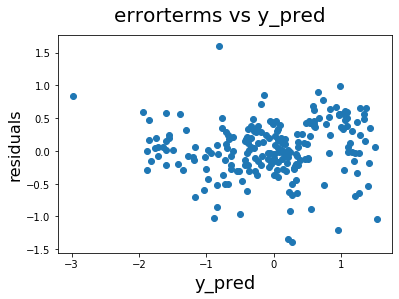

In [103]:
residual = bike_y_test - bike_y_pred

fig = plt.figure()
plt.scatter(bike_y_pred, residual)
fig.suptitle('errorterms vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)

In [100]:
from sklearn.metrics import r2_score
r2_score(bike_y_test, bike_y_pred)

0.8188800956274603